#**Exponential smoothing**



##  install these libraries using pip:



In [69]:
!pip install pandas matplotlib

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


## Loading dataset

In [71]:
data.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [72]:
data = pd.read_csv('/content/traffic.csv', parse_dates=['DateTime'], index_col='DateTime')
data.head()


,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


## Visualizing the data





In [73]:
data = data.iloc[0:1000]

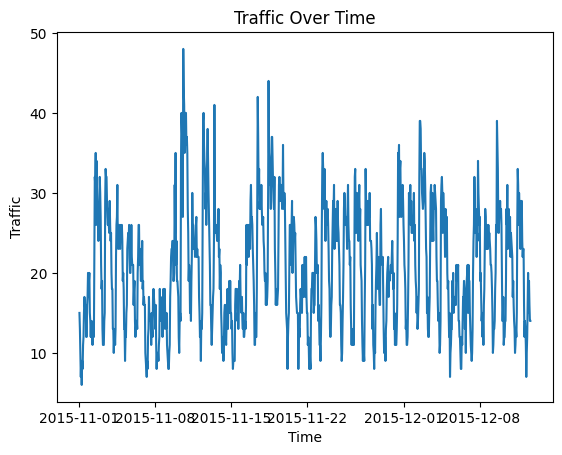

In [74]:
plt.plot(data['Vehicles'])
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Traffic Over Time')
plt.show()

#**Single Exponential smoothing**





In [75]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(data['Vehicles'])
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [93]:
forecast_single = model_fit.forecast(30)
print(forecast_single)

2015-12-12 16:00:00    14.000196
2015-12-12 17:00:00    14.000196
2015-12-12 18:00:00    14.000196
2015-12-12 19:00:00    14.000196
2015-12-12 20:00:00    14.000196
2015-12-12 21:00:00    14.000196
2015-12-12 22:00:00    14.000196
2015-12-12 23:00:00    14.000196
2015-12-13 00:00:00    14.000196
2015-12-13 01:00:00    14.000196
2015-12-13 02:00:00    14.000196
2015-12-13 03:00:00    14.000196
2015-12-13 04:00:00    14.000196
2015-12-13 05:00:00    14.000196
2015-12-13 06:00:00    14.000196
2015-12-13 07:00:00    14.000196
2015-12-13 08:00:00    14.000196
2015-12-13 09:00:00    14.000196
2015-12-13 10:00:00    14.000196
2015-12-13 11:00:00    14.000196
2015-12-13 12:00:00    14.000196
2015-12-13 13:00:00    14.000196
2015-12-13 14:00:00    14.000196
2015-12-13 15:00:00    14.000196
2015-12-13 16:00:00    14.000196
2015-12-13 17:00:00    14.000196
2015-12-13 18:00:00    14.000196
2015-12-13 19:00:00    14.000196
2015-12-13 20:00:00    14.000196
2015-12-13 21:00:00    14.000196
Freq: H, d

## Visualize Single Exponential Smoothing




In [94]:
forecast_single = model_fit.forecast(60)

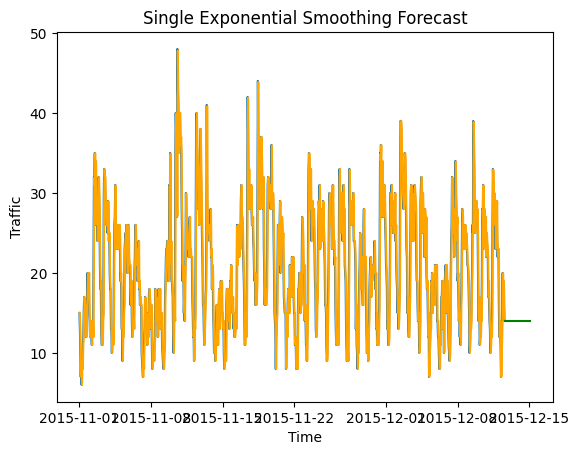

In [92]:
plt.plot(data['Vehicles'],label='orginal Data')
plt.plot(model_fit.fittedvalues, color='orange',label='fitted values')
plt.plot(forecast_single, color='green',label='forecast')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Single Exponential Smoothing Forecast')
plt.show()

#**Double Exponential Smoothing**




In [79]:
 #Extract the relevant time series data as a 1D array
endog_data = data['Vehicles']

model_double = Holt(endog_data)  # Pass the 1D array to the Holt model
model_double_fit = model_double.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [95]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

2015-12-12 16:00:00    13.923808
2015-12-12 17:00:00    13.847659
2015-12-12 18:00:00    13.771510
2015-12-12 19:00:00    13.695361
2015-12-12 20:00:00    13.619212
2015-12-12 21:00:00    13.543063
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [96]:
forecast_double = model_double_fit.forecast(40)


Text(0.5, 1.0, 'Double Exponential Smoothing Forecast')

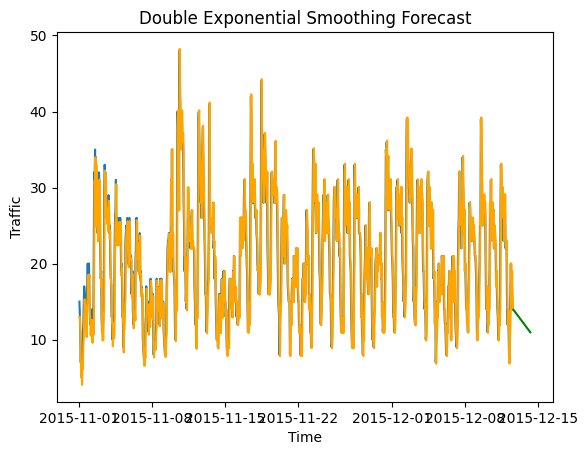

In [97]:
plt.plot(data['Vehicles'],label='orginal Data')
plt.plot( model_double_fit.fittedvalues, color='orange',label='fitted values')
plt.plot(forecast_double, color='green',label='forecast')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Double Exponential Smoothing Forecast')

#**Holt-Winter’s Seasonal Smoothing**






In [83]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    data['Vehicles'], seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [98]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)


2015-12-12 16:00:00    12.493624
2015-12-12 17:00:00    11.577899
2015-12-12 18:00:00    12.781961
2015-12-12 19:00:00    14.275633
2015-12-12 20:00:00    14.985942
2015-12-12 21:00:00    17.215220
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [99]:
forecast_triple = model_triple_fit.forecast(40)


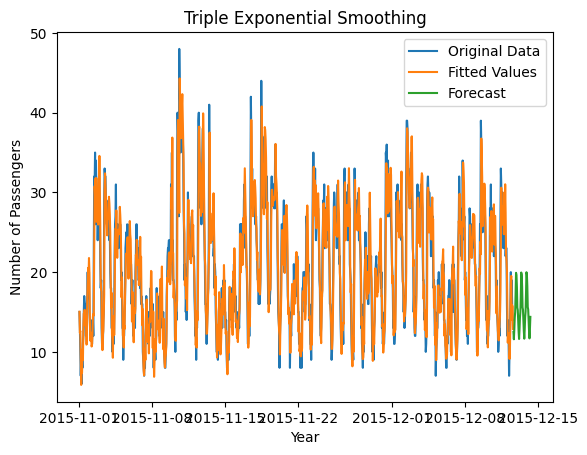

In [100]:
plt.plot(data['Vehicles'], label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


##**Well done :)**